In [ ]:
!pip install grplot

In [1]:
from grplot import grplot

In [2]:
help(grplot)

Help on function grplot in module grplot:

grplot(plot, df, x=None, y=None, Nx=None, Ny=None, figsize=[8, 6], pad=6, hpad=None, wpad=None, hue=None, size=None, fontsize=10, tick_fontsize=None, legend_fontsize=None, text_fontsize=None, label_fontsize=None, title_fontsize=None, sep=',', xsep=None, ysep=None, lim=None, xlim=None, ylim=None, log=None, xlog=None, ylog=None, dt=None, xdt=None, ydt=None, tick_add=None, xtick_add=None, ytick_add=None, rot=None, xrot=None, yrot=None, statdesc=None, xstatdesc=None, ystatdesc=None, text=None, xtext=None, ytext=None, label_add=None, xlabel_add=None, ylabel_add=None, title=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend=None, height=None, units=None, x_bins=None, y_bins=None, estimator=None, x_estimator=None, ci=None, n_boot=None, alpha=None, expand_margins=None, jitter=None, x_jitter=None, y_jitter=None, weights=None, color=None, seed=No

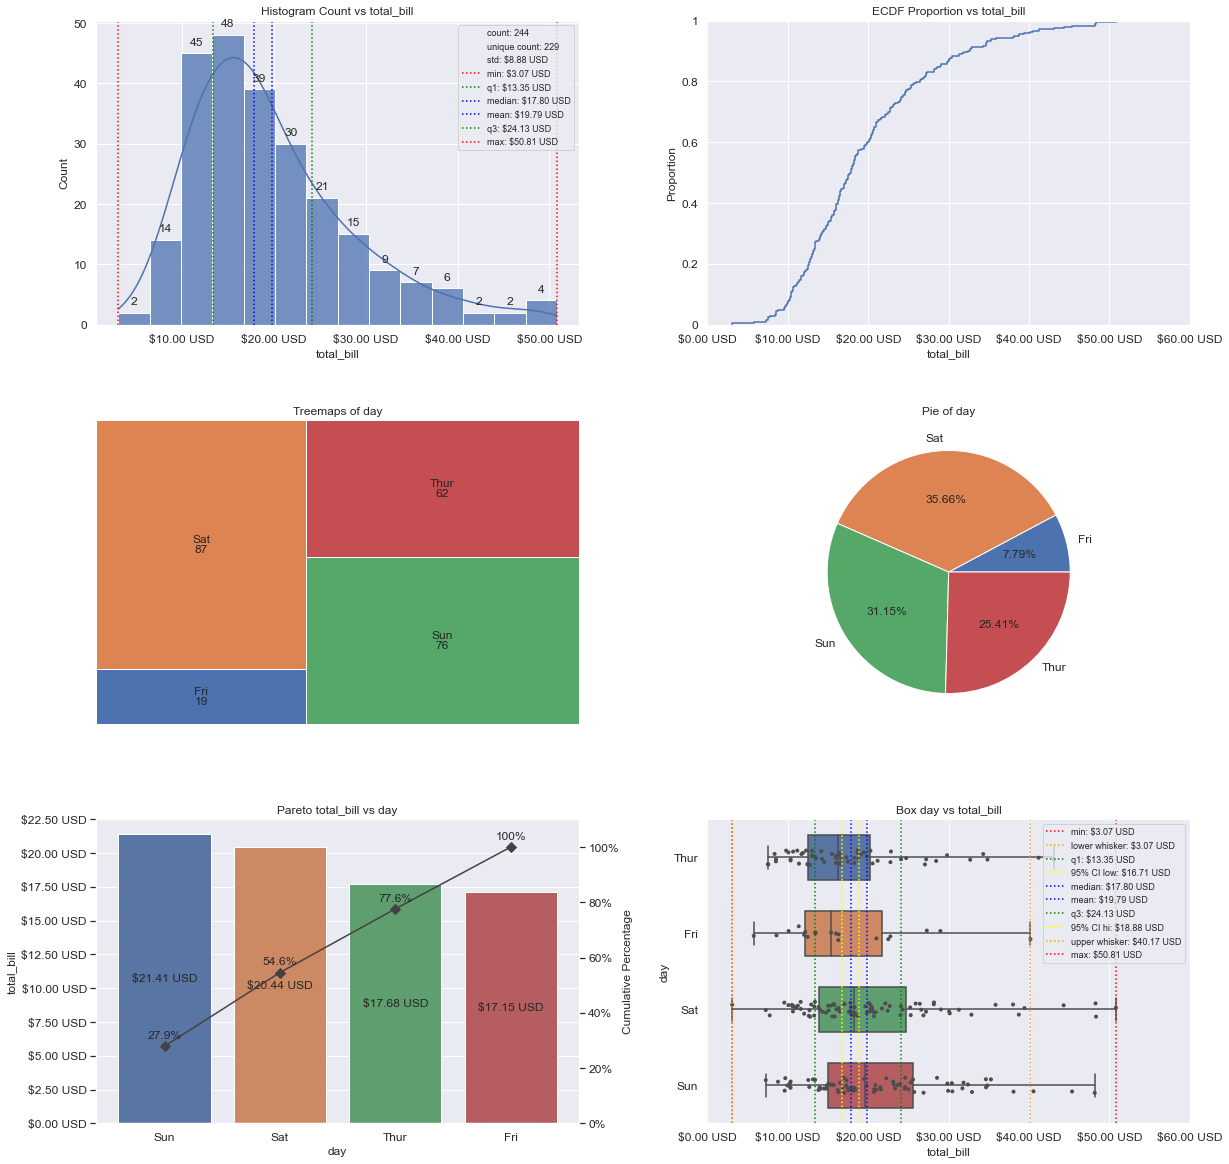

In [3]:
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep')


tips = sns.load_dataset('tips')
ax = grplot(plot={'[1,1]':'histplot', '[1,2]':'ecdfplot', '[2,1]':'treemapsplot', '[2,2]':'pieplot', '[3,1]':'paretoplot', '[3,2]':'boxplot+stripplot'}, 
            Nx=2,
            Ny=3,
            df=tips, 
            x=['total_bill', 'total_bill', 'day', 'day', 'day', 'total_bill'], 
            y=[None, None, None, None, 'total_bill', 'day'], 
            hpad=6,
            wpad=8,
            figsize=[16,16], 
            fontsize=12, 
            legend_fontsize=9,
            sep={'total_bill':',c', ',':['Count', 'Proportion', '[2,1]', '[2,2]', 'Cumulative Percentage']}, 
            statdesc={'[1,1]':{'total_bill':'general'}, '[3,2]':{'total_bill':'boxplot'}},
            text={'Count':'h', True:['[2,1]', '[2,2]'], '[3,1]':{'total_bill':'h+i'}},
            tick_add={'total_bill':'$(_) USD'},
            title={'[1,1]':'Histogram Count vs total_bill', '[1,2]':'ECDF Proportion vs total_bill', '[2,1]':'Treemaps of day',  '[2,2]':'Pie of day', '[3,1]':'Pareto total_bill vs day', '[3,2]':'Box day vs total_bill'},
            kde=True,
            stat={'[1,2]':'proportion'},
            alpha={'[1,1]':[0.75,1]}
            )

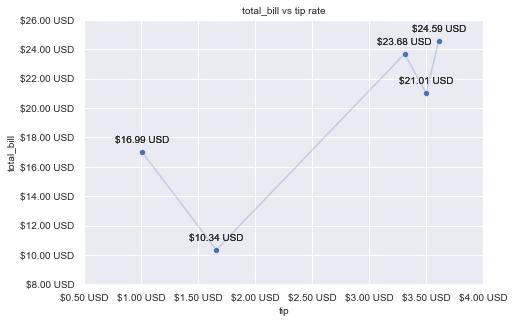

In [4]:
ax = grplot(plot='lineplot+scatterplot', 
            df=tips.head(5), 
            x='tip', 
            y='total_bill', 
            sep=',c', 
            tick_add={'$(_) USD':['tip','total_bill']},
            ytext=True, 
            title='total_bill vs tip rate',
            alpha=[0.25,1])

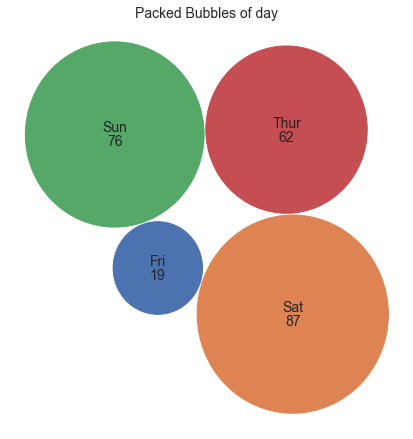

In [5]:
ax = grplot(plot='packedbubblesplot', 
            df=tips, 
            x='day', 
            figsize=[8,8],
            fontsize=14, 
            text=True, 
            title='Packed Bubbles of day')

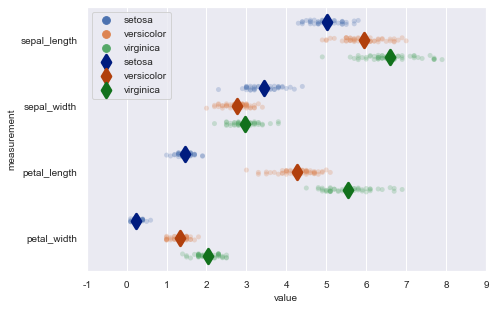

In [6]:
import pandas as pd
iris = sns.load_dataset('iris')


iris = pd.melt(iris, 'species', var_name='measurement')
ax = grplot(plot='stripplot+pointplot',
            df=iris,
            x='value', 
            y='measurement', 
            hue='species')

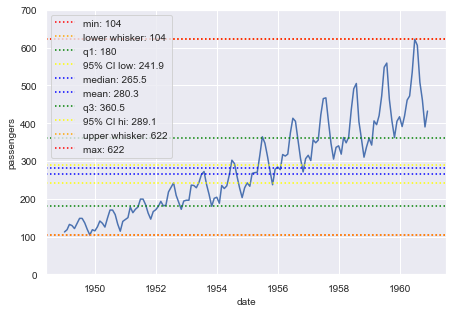

In [7]:
flights = sns.load_dataset('flights')
flights['date'] = (flights['year'].astype(str) + ' ' +flights['month'].astype(str)).apply(pd.to_datetime)


ax = grplot(plot='lineplot', 
            df=flights, 
            x='date', 
            y='passengers', 
            xdt='%Y', 
            ystatdesc='boxplot')